# Em(cee)lynn's Final Project
#### Emmalynn Malixi ~ PHYS265 ~ May 18th, 2025

### Getting Started

[1] The package emcee is a Python package that implements Goodman & Weare's Affine Invariant Markov Chain Monte Carlo (MCMC) algorithm using an ensemble sampler. It is designed to facilitate easier parameter estimation in Bayesian statistics by only requiring the hand-tuning of one or two parameters. 

It is an open-sourced and MIT-licensed tool. It is well-suited for complex, high-dimensional probability distributions, allowing it to be useful in various fields and applications. 

[2] I chose to do my project on the emcee package because I am a physics major specializing in bio-physics. This package has a wide range of applications across both the physical and biological sciences. It is particularly helpful with data that is noisy or uncertain, such as in medical research, imaging, or biological modeling. 

One of the strengths of emcee is its ability to quantify uncertainty in the model parameters, which provides further insight into results and facilitates a better understanding of the reliability of the data. The affine-invariant nature simplifies the parameter estimation and does not require extensive manual tuning, allowing for easier organization of the results. 

[3] emcee was first released in 2012, making it now about 13 years old. It originated from the "stretch move" method from Goodman & Weare and was built on MCMC methods such as Metropolis-Hastings and Gibbs sampling. 

There are other codes that are used to solve issues similarly to emcee, such as `PyMC3` and `PyMC4`. Both perform Bayesian inference by sampling from probability distributions, just like emcee.


I have the version 3.1.6. I found this using the code `print(emcee.__version__)`.

[4] emcee is still maintained by the original author Dan Foreman-Mackey, as well as contributions from other developers. Contributions as such are welcome, with instructions being provided on GitHub at https://github.com/dfm/emcee. 

[5] This package was fairly easy to install. I used `!pip install`, and it only took about thirty seconds. It was also fairly straightforward to use. There were plenty of instructions and resources to learn how to use the package after installation. 

[6] I was able to use the "standard" pip to install. 

In [1]:
!pip install emcee
import emcee
print(emcee.__version__)

3.1.6


[7] The source code is available and can be found on the emcee GitHub (see [4]). It includes the full source code, as well as tutorials and documentation. There is also instructions to check that the installation was succesful via `pytest`.

[8] emcee is used by other packages such as `exoplanet`, which includes it as one of its MCMC samplers. Another example is `starfish`, which uses emcee specifically to sample the posterior distribution of parameters in spectral modeling. 

[9] emcee is primarily used in a Python script or Jupyter notebook. Since it is a Python library, it is not used in a web interface or as a standalone tool. 

### Code

[10] I used emcee to conduct an MCMC sampling from a multivariate Gaussian distribution given a specified mean vector and a covariance matrix. This allowed me to understand the statistical properties based on the parameter space. This example is provided from emcee's page on GitHub, where there is a step-by-step tutorial that explains the purpose of each command.

In [2]:
import numpy as np
import emcee 

def log_prob(x, mu, cov):
    diff = x - mu
    return -0.5 * np.dot(diff, np.linalg.solve(cov, diff))

ndim = 5
np.random.seed(42)
means = np.random.rand(ndim)
cov = 0.5 - np.random.rand(ndim**2).reshape((ndim, ndim))
cov = np.triu(cov)
cov += cov.T - np.diag(cov.diagonal())
cov = np.dot(cov, cov)

nwalkers = 32
p0 = np.random.rand(nwalkers, ndim)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=[means, cov])

log_prob(p0[0], means, cov)

state = sampler.run_mcmc(p0, 100)
sampler.reset()
sampler.run_mcmc(state, 10000);
samples = sampler.get_chain(flat=True)

[11] With the example provided by emcee's GitHub, I was able to code emcee conducting MCMC sampling from the 5D Gaussian distribution, given a mean vector and covariance matrix. To visualize these results, I can produce figures using `matplotlib`. I created a set of trace plots for each parameter that display the sampling behavior and help visualize convergence. I then created a histogram displaying the posterior distribution of one of the parameters.

These examples demonstrate how emcee can sample efficiently from complex distributions, even with uncertainty or noise. They also showcase how emcee facilitates easy visualization of the results, providing insight into the convergence of the sampler and accuracy of the parameter estimates.

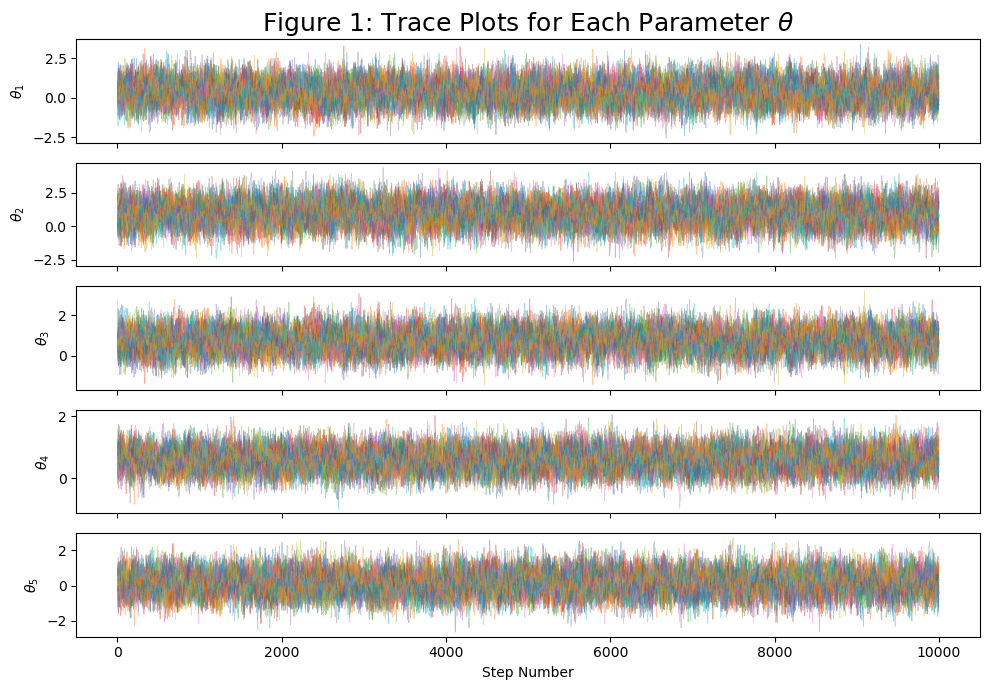

In [3]:
import matplotlib.pyplot as plt
chain = sampler.get_chain()
nsteps, nwalkers, ndim = chain.shape

fig,ax=plt.subplots(ndim, figsize=(10, 7), sharex=True)

for i in range(ndim):
    for j in range(nwalkers):
        ax[i].plot(chain[:, j, i], alpha=0.4, lw=0.5)
    ax[i].set_ylabel(f"$\\theta_{i+1}$")

ax[-1].set_xlabel("Step Number")
ax[0].set_title(r"Figure 1: Trace Plots for Each Parameter $\theta$",fontsize=18)
plt.tight_layout()
plt.show()

[12.1] Figure 1: These trace plots display the sampling path of a walker over steps, visualizing the sampling behavior and convergence. 

Text(0.5, 1.0, 'Figure 2: Posterior Distribution of Parameter $\\theta_1$')

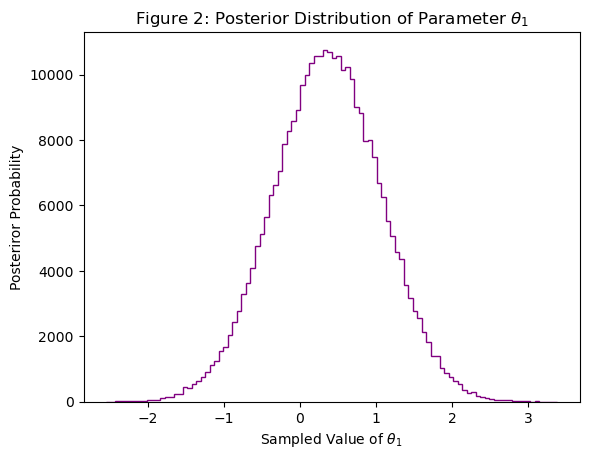

In [4]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax.hist(samples[:,0],bins=100,color='purple',histtype='step')
ax.set_xlabel(r'Sampled Value of $\theta_1$')
ax.set_ylabel('Posteriror Probability')
ax.set_title(r'Figure 2: Posterior Distribution of Parameter $\theta_1$')

[12] Figure 2: Histogram of samples for the first parameter θ1 from the MCMC chain, based on a five-dimensional Gaussian derived from emcee. The plot displays the distribution of θ1 after running the sampling process.

### Evaluation

[13] emcee is a purely Python package. It does not require accompanying C, C++, or Fortran code.

[14] emcee requires one main input: the log-probability function, which I represented in code as `log_prob`. This defines the model's posterior probability and can include inputs such as model parameters, observational data, and uncertainties. The data applied to the emcee process can be real or generated from scratch depending on the application. 

[15] emcee outputs samples of the model parameters from the distribution, as well as diagnostic values that would be used to evaluate the performance and convergence for the sampling process. This evaluation helps to show if the sampler effectively explored the parameter space, and therefore the quality of the results. 

[16] When you install the source of emcee, there is basic testing to check if the installation was successful. For unit tests, there is a basic test suite located in the source code (see [4]), but it only checks basic functionality. emcee also does not have a formal regression test, but it can be manually checked using Python's `pytest` feature. For benchmarking there is similary not a fomral command, but it can be manually tested with more standard Python functions such as `time` or `timeit`.

[17] The diagnostic values help to evaluate the accuracy of the sampling. Visual checks, such as the trace plots and histograms, allow confirmation of whether the sampler has effectively explored the space and provided reliable results. It is also worth noting that emcee is a widely used package and likely more trustable than a smaller, more niche package.

[18] This package primarily depends on `numpy`. It can also be useful to have additional packages such as `scipy` and `pytest`. `scipy` is useful for evaluating different kinds of math to implement into emcee, and `pytest` is to check the accuracy of the samples. I know this because these are the primary accompanying packages that I used throughout the code I wrote. There is also a section on the emcee Github called `pyproject.toml` which provides lists of dependencies and build requirements. 

[19] The emcee package provides documentation on the GitHub repository, which, for my project, was fairly sufficient. Examples helped me to understand and implement MCMC sampling. The "Read the Docs" feature in particular helped me to understand how to utilize the emcee package effectively. 

However, GitHub also provides further documentation resources such as David MacKay's Information Theory, Inference, and Learning Algorithms, as well as "emcee: The MCMC Hammer" from arXiv. I downloaded MacKay's book and read the arXiv paper.

[20] The emcee GitHub states to cite "emcee: The MCMC Hammer" from arXiv if the package is used in research. 

Foreman-Mackey, D., et al. (2013). “emcee: The MCMC Hammer.” Publications of the Astronomical Society of the Pacific, 125(925), 306. DOI:10.1086/670067 (https://doi.org/10.1086/670067)

[21] References:
- Preferred citation: https://arxiv.org/abs/1202.3665
- emcee GitHub Repository:
https://github.com/dfm/emcee
- emcee GitHub Read the Docs: https://emcee.readthedocs.io/en/stable/
- David MacKay's Information Theory, Inference, and Learning Algorithms: https://www.inference.org.uk/itprnn/book.pdf


[22] Using ADS there are 10665 citations to "emcee: The MCMC Hammer". Here are two:
- Transit timing variations of the sub-Saturn exoplanet HAT-P-12b: https://ui.adsabs.harvard.edu/#abs/2025NewA..11902390P/abstract
- Studying orbital period variations of XY Leo through updated eclipse times and multi-model analysis: https://ui.adsabs.harvard.edu/#abs/2025NewA..11802374N/abstract

[23] I worked with `sampler` commands that I was not entirely familiar with. However, other than that, the class was able to cover the rest of the Python content that I needed. 


[24] This was all new to me. I enjoyed this project! 

I discussed this project with others to clarify uncertainties we had about certain questions. I completed this report on my own. 

#### Have a good summer professors!